In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.append("..")

In [3]:
import numpy as np
from scipy.stats import norm

from MNIST_VAE import Hyper, MnistVae

Using TensorFlow backend.


In [4]:
from keras.datasets import mnist

# train the VAE on MNIST digits
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [5]:
h = Hyper(epochs=50)
model = MnistVae(h)
        
history = model.fit(x_train, x_train,
        shuffle=True,
        epochs=h.epochs,
        batch_size=h.batch_size,
        validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s - loss: 190.4193 - val_loss: 172.1307
Epoch 2/50
60000/60000 [==============================] - 2s - loss: 169.7215 - val_loss: 168.0347
Epoch 3/50
60000/60000 [==============================] - 2s - loss: 166.5244 - val_loss: 165.2285
Epoch 4/50
60000/60000 [==============================] - 2s - loss: 164.4541 - val_loss: 163.5461
Epoch 5/50
60000/60000 [==============================] - 2s - loss: 162.9684 - val_loss: 162.3164
Epoch 6/50
60000/60000 [==============================] - 2s - loss: 161.6599 - val_loss: 161.3713
Epoch 7/50
60000/60000 [==============================] - 2s - loss: 160.4484 - val_loss: 160.4717
Epoch 8/50
60000/60000 [==============================] - 2s - loss: 159.3498 - val_loss: 159.2498
Epoch 9/50
60000/60000 [==============================] - 2s - loss: 158.4188 - val_loss: 158.6866
Epoch 10/50
60000/60000 [==============================] - 

In [6]:
history.history

{'val_loss': [172.13065658569337,
  168.03465728759767,
  165.22853271484374,
  163.54605072021485,
  162.31644149780274,
  161.3713458251953,
  160.47174209594726,
  159.24980087280272,
  158.6865771484375,
  158.04470703125,
  156.94893981933595,
  156.85760620117188,
  156.3557566833496,
  155.58707229614257,
  156.07188095092772,
  155.47432479858398,
  154.9561672973633,
  155.01237411499022,
  154.48955520629883,
  154.76859634399415,
  154.04271209716796,
  154.01692886352538,
  153.7957962036133,
  153.68529907226562,
  153.35667846679686,
  153.31667541503907,
  153.48055053710937,
  153.1736575317383,
  153.42189422607422,
  153.14922653198244,
  153.07091674804687,
  152.76451065063478,
  152.72401168823242,
  152.56866744995116,
  152.5747639465332,
  152.62086181640626,
  152.22981018066406,
  152.17996856689453,
  151.95196868896485,
  152.21496322631836,
  152.21087982177735,
  152.19728469848633,
  152.35302352905273,
  152.10303955078126,
  152.01563079833986,
  152.13

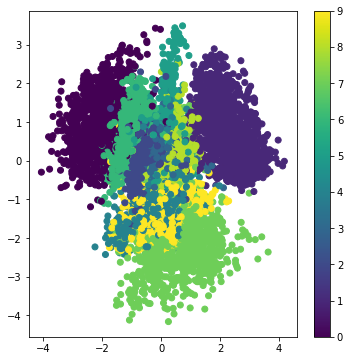

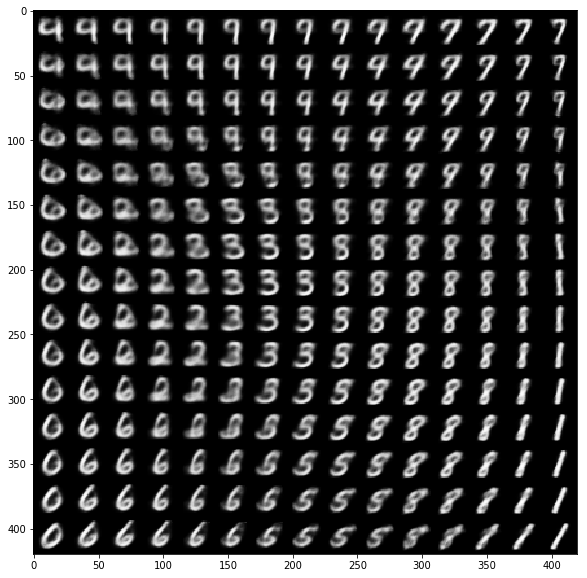

In [7]:
# display a 2D plot of the digit classes in the latent space
x_test_encoded = model.encoder.predict(x_test, batch_size=h.batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()

# display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# linearly spaced coordinates on the unit square were transformed through the inverse CDF (ppf) of the Gaussian
# to produce values of the latent variables z, since the prior of the latent space is Gaussian
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = model.generator.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.show()

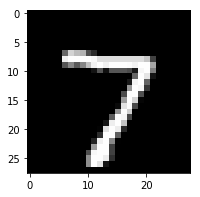

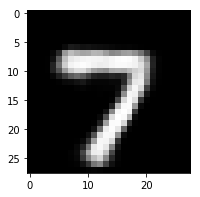

In [8]:
encoding = model.encode(x_test[:3])
decoding = model.generate(encoding)

plt.figure(figsize=(3, 3))
plt.imshow(x_test[0].reshape((28, 28)), cmap='Greys_r')
plt.show()

plt.figure(figsize=(3, 3))
plt.imshow(decoding[0].reshape((28, 28)), cmap='Greys_r')
plt.show()

In [9]:
model.save('../models/mnist_test.h5')

In [10]:
model2 = MnistVae(h)
model2.load_weights('../models/mnist_test.h5')

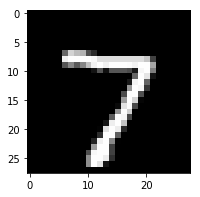

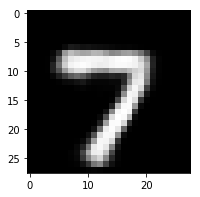

In [11]:
encoding = model2.encode(x_test[:3])
decoding = model2.generate(encoding)

plt.figure(figsize=(3, 3))
plt.imshow(x_test[0].reshape((28, 28)), cmap='Greys_r')
plt.show()

plt.figure(figsize=(3, 3))
plt.imshow(decoding[0].reshape((28, 28)), cmap='Greys_r')
plt.show()